In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
%config InlineBackend.figure_format = 'svg'
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

When attemping to train a linear model that predicts burn area by land cover type, I discovered that 2005 had a lot of "shrub" burn area. 

In [36]:
df = pd.read_csv("../Data/Fire/FPA_FOD/FPA_FOD_with_MODIS_Land_Cover_2005.csv")
print(df.columns.values)

m1 = np.array(df["Closed shrublands"].values > 0., dtype=bool)
m2 = np.array(df["Open shrublands"].values > 0., dtype=bool)
shrub_burn_mask = np.logical_and(m1, m2)

df_shrubs = df.iloc[shrub_burn_mask,:]

shrub_burn_area = df.loc[shrub_burn_mask,"Closed shrublands"].values + df.loc[shrub_burn_mask,"Open shrublands"].values
lat = df.loc[shrub_burn_mask, "LATITUDE"].values
lon = df.loc[shrub_burn_mask, "LONGITUDE"].values

['Unnamed: 0' 'Unnamed: 0.1' 'FOD_ID' 'FPA_ID' 'SOURCE_SYSTEM_TYPE'
 'SOURCE_SYSTEM' 'NWCG_REPORTING_AGENCY' 'NWCG_REPORTING_UNIT_ID'
 'NWCG_REPORTING_UNIT_NAME' 'SOURCE_REPORTING_UNIT'
 'SOURCE_REPORTING_UNIT_NAME' 'LOCAL_FIRE_REPORT_ID' 'LOCAL_INCIDENT_ID'
 'FIRE_CODE' 'FIRE_NAME' 'ICS_209_INCIDENT_NUMBER' 'ICS_209_NAME'
 'MTBS_ID' 'MTBS_FIRE_NAME' 'COMPLEX_NAME' 'FIRE_YEAR' 'DISCOVERY_DATE'
 'DISCOVERY_DOY' 'DISCOVERY_TIME' 'STAT_CAUSE_CODE' 'STAT_CAUSE_DESCR'
 'CONT_DATE' 'CONT_DOY' 'CONT_TIME' 'FIRE_SIZE' 'FIRE_SIZE_CLASS'
 'LATITUDE' 'LONGITUDE' 'OWNER_CODE' 'OWNER_DESCR' 'STATE' 'COUNTY'
 'FIPS_CODE' 'FIPS_NAME' 'START_MONTH' 'NA_L2CODE' 'Water'
 'Evergreen Needleleaf forest' 'Evergreen Broadleaf forest'
 'Deciduous Needleleaf forest' 'Deciduous Broadleaf forest' 'Mixed forest'
 'Closed shrublands' 'Open shrublands' 'Woody savannas' 'Savannas'
 'Grasslands' 'Permanent wetlands' 'Croplands' 'Urban and built-up'
 'Cropland/Natural vegetation mosaic' 'Snow and ice'
 'Barren or spar

In [20]:
np.min(shrub_burn_area)

0.09999999999994058

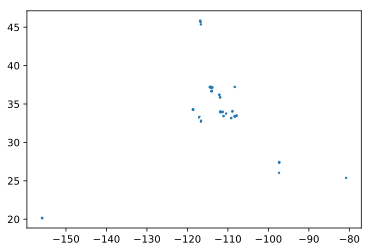

In [29]:
plt.figure()
plt.scatter(lon, lat, s=np.log10(shrub_burn_area))

In [33]:
np.max(df_shrubs["dArea"])

7.712515071034431e-10

In [50]:
print(df.columns.values)
cols = ['FIRE_NAME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE','Closed shrublands','Open shrublands']
df_shrubs.sort_values(by="FIRE_SIZE", ascending=False)[cols]

['Unnamed: 0' 'Unnamed: 0.1' 'FOD_ID' 'FPA_ID' 'SOURCE_SYSTEM_TYPE'
 'SOURCE_SYSTEM' 'NWCG_REPORTING_AGENCY' 'NWCG_REPORTING_UNIT_ID'
 'NWCG_REPORTING_UNIT_NAME' 'SOURCE_REPORTING_UNIT'
 'SOURCE_REPORTING_UNIT_NAME' 'LOCAL_FIRE_REPORT_ID' 'LOCAL_INCIDENT_ID'
 'FIRE_CODE' 'FIRE_NAME' 'ICS_209_INCIDENT_NUMBER' 'ICS_209_NAME'
 'MTBS_ID' 'MTBS_FIRE_NAME' 'COMPLEX_NAME' 'FIRE_YEAR' 'DISCOVERY_DATE'
 'DISCOVERY_DOY' 'DISCOVERY_TIME' 'STAT_CAUSE_CODE' 'STAT_CAUSE_DESCR'
 'CONT_DATE' 'CONT_DOY' 'CONT_TIME' 'FIRE_SIZE' 'FIRE_SIZE_CLASS'
 'LATITUDE' 'LONGITUDE' 'OWNER_CODE' 'OWNER_DESCR' 'STATE' 'COUNTY'
 'FIPS_CODE' 'FIPS_NAME' 'START_MONTH' 'NA_L2CODE' 'Water'
 'Evergreen Needleleaf forest' 'Evergreen Broadleaf forest'
 'Deciduous Needleleaf forest' 'Deciduous Broadleaf forest' 'Mixed forest'
 'Closed shrublands' 'Open shrublands' 'Woody savannas' 'Savannas'
 'Grasslands' 'Permanent wetlands' 'Croplands' 'Urban and built-up'
 'Cropland/Natural vegetation mosaic' 'Snow and ice'
 'Barren or spar

,FIRE_NAME,FIRE_SIZE,LATITUDE,LONGITUDE,Closed shrublands,Open shrublands
66108,HUMBOLDT,248310.0,33.978333,-111.822778,52.944182,246021.959659
16706,DUZAK,238058.0,37.200000,-114.383100,117.025052,235644.253843
4975,BULL,77000.0,33.394722,-108.289722,46491.504312,4727.235047
17547,WESTSID CX,65480.0,37.147500,-113.925300,370.609272,62847.591632
65932,GRANITE CREEK,36800.0,45.363333,-116.666389,105.888363,52.944182
13822,MTBANGSCOM,28177.2,36.679400,-114.017800,270.390567,27642.088525
18594,TOPANGA,24970.0,34.283300,-118.610600,93.930842,11576.264952
65933,CHERRY CREEK,18177.0,45.841667,-116.849444,554.502323,264.720908
4572,JOHNSON,11611.0,34.046667,-108.879444,2587.068829,1869.617784
18314,DAISY,10003.0,27.370190,-97.337710,540.306729,1033.733402


In [56]:
df_shrubs.loc[df_shrubs.FIRE_NAME=="HUMBOLDT",:].T

,66108
Unnamed: 0,1034455
Unnamed: 0.1,1059559
FOD_ID,1271831
FPA_ID,FS-1430376
SOURCE_SYSTEM_TYPE,FED
SOURCE_SYSTEM,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS
NWCG_REPORTING_UNIT_ID,USAZTNF
NWCG_REPORTING_UNIT_NAME,Tonto National Forest
SOURCE_REPORTING_UNIT,0312
